In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [261]:
# attr_name = 'charge_strength'
attr_name = 'node_edge_strength'
# attr_name = 'ellipse_aspect_ratio'

fn = f'./parameter-scan-result/{attr_name}.json'
df = pd.read_json(fn)
if attr_name == 'charge_strength':
    df[attr_name] = df[attr_name].abs()


df.head(6)

,edge_length_preservation,compactness,runtime,graph,node_edge_strength,edge_mode
0,0.212420,0.119479,6.9414,lastfm,0.01,linear
1,0.219615,0.116208,6.8216,lastfm,0.03,linear
2,0.299483,0.109953,6.7988,lastfm,0.10,linear
3,0.540012,0.080576,7.3008,lastfm,0.30,linear
4,1.018544,0.023886,8.4282,lastfm,0.60,linear
5,0.559682,0.121672,6.7010,lastfm,0.01,uniform


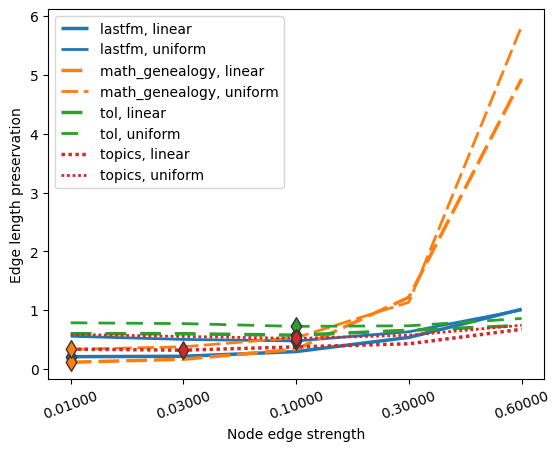

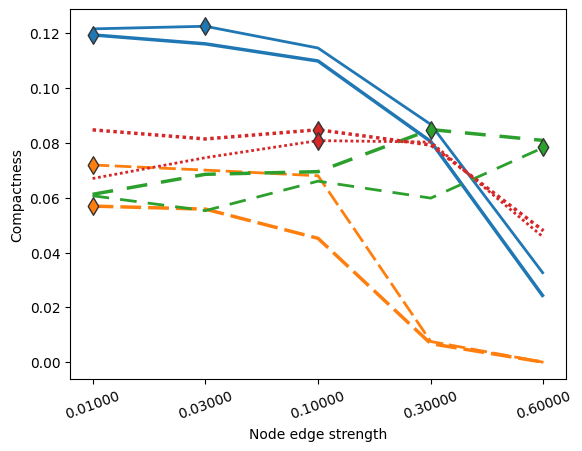

In [263]:
linestyles = [
    (0, ()),
    (0, (6, 2)),
    (0, (6, 4)),
    (0, (1, 1)),
]

attr_x = attr_name
xlabel = attr_x.replace('_', ' ').capitalize()
# xlabel = 'Ellipse aspect ratio'

for attr_y in ['edge_length_preservation', 'compactness']:
    
    ylabel = attr_y.replace('_', ' ').capitalize()
    if attr_y == 'edge_length_preservation':
        best = np.argmin
    else:
        best = np.argmax

    for i, [[graph, edge_mode], sub_df] in enumerate(df.groupby(['graph', 'edge_mode'])):
        n = len(sub_df)
        
        x = sub_df[attr_x].tolist()
        y = sub_df[attr_y].tolist()
        
        color = f'C{i//2}'
        linestyle = linestyles[i//2]
        linewidth = 2.5 if edge_mode == 'linear' else 2
        marker = '' if edge_mode == 'linear' else ''
        
        plt.plot(
            y,
            label=f'{graph}, {edge_mode}',
            color=color, marker=marker, 
            linewidth=linewidth,
            linestyle=linestyle, 
        )
        j = best(y)
        plt.scatter([j], y[j], s=80, c=color, lw=1, edgecolors='#333', marker='d', zorder=10)
        
        plt.xticks(np.arange(n), [f'{xi:.5f}' for xi in x], rotation=20)
        plt.xlabel(xlabel)
        plt.ylabel(ylabel)
    if attr_y == 'edge_length_preservation':
        plt.legend()
#     if attr_y == 'compactness':
#         plt.legend()
    plt.savefig(f'./parameter-scan-result/{attr_x}-vs-{attr_y}.png', bbox_inches='tight')
    plt.show()
